# Oleksandr Borysiuk
## Homework 2
    * Student ID: 60036
    * E-mail: oborysi1@stu.vistula.edu.pl
    * Saved: 2022-06-26
   

## Problem 1

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

def problem1(file_path="./monthly_unemployment_by_ages.csv"):
    # Applying necessary style
    plt.style.use("seaborn-deep")
    # Setting correct grid style
    sns.set_style("darkgrid")

    # Reading data from csv file
    data_unemployed = pd.read_csv(file_path)
    # Aranging data for each age category
    y = [ data_unemployed.iloc[:, i] for i in range( 1, len(data_unemployed.columns))]
    
    # Defining figure and axes objects
    fig, ax = plt.subplots(figsize=(10, 7))
    # Setting xlabel text and fontsize
    plt.xlabel("Year", fontsize=20)
    # Setting ylabel text and fontsize
    plt.ylabel("Unemployment", fontsize=20)
    # Setting grid to be visible
    ax.grid(True)
    # Applying formatting on yticks
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: str(int(x)//1000000)+'.0M'))
    # Setting white line width to 0 so it appears invisible
    lines = ax.stackplot(range(len(y[0])), y, **{'linewidth': 0})
    # Setting legend parameters for figure
    plt.legend(data_unemployed.columns[1:], loc='upper left', frameon=False)
    plt.show()

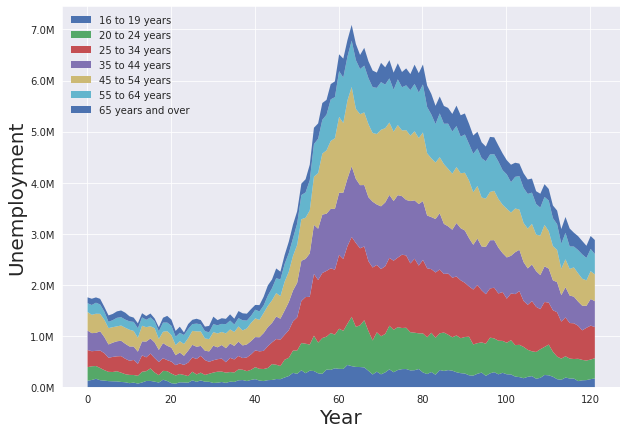

In [2]:
file_path = './data/monthly_unemployment_by_ages.csv' # i've stored data in separate folder
problem1(file_path) # without file_path defaults to JN location to search for data

## Problem 2

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox

import pandas as pd
import numpy as np


def problem2(file_path="./corona_china_vs_rest.csv"):
    # Setting style to default from previous task
    # Possible dpi issues. Solution - reload ipython kernel
    plt.style.use('default')
    
    # Reading data from csv file
    data_corona = pd.read_csv(file_path)
    # Setting figuresize to be 5x5 inches
    plt.figure(figsize=(5,5))
    
    # defining axes object
    ax = plt.subplot(111)
    # Remover top spines
    ax.spines['top'].set_visible(False)
    # Setting xlabel
    ax.set(xlabel="Days")
    # Drawing line for non China
    h1 = ax.plot(data_corona.rest, c='r', marker='s', ms=5, label='rest (left-axis)')

    # Applying twinx to get secondary yaxis for drawings
    ax1 = ax.twinx()
    # Setting title
    ax1.set_title('Number of cases')
    # Removing tob spine from new axes obj
    ax1.spines['top'].set_visible(False)
    # Draving graph for China
    h2 = ax1.plot(data_corona.china, c='b', marker='v', ms=5, label='china (right-axis)')
    
    # This part is for legend box
    # By combining two graphs i managed to apply get_label() method
    lines = h2 + h1
    labs = [line.get_label() for line in lines]
    # here labels getting passed to legend
    ax1.legend(lines, labs, loc='upper left')

    # Saving png file of resulting figure
    plt.savefig('plot.png', dpi=300, facecolor='white', bbox_inches=Bbox(np.array([[0.0,0.0], [5.3, 5.0]])))
    plt.show()

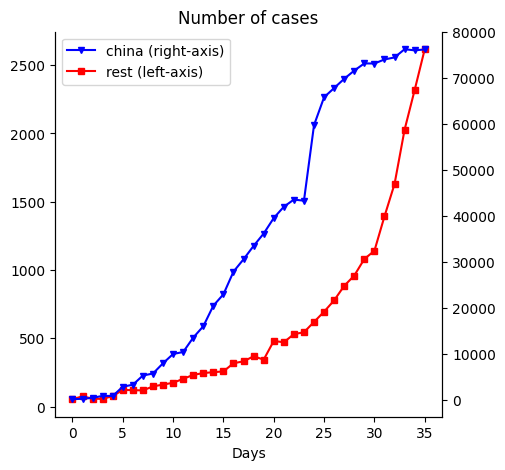

In [4]:
file_path = "./data/corona_china_vs_rest.csv" # i've stored data in separate folder
problem2(file_path) # without file_path defaults to JN location to search for data

## Problem 3

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

def problem3(file_path='./phd_by_field.csv'):
    # Reading data
    data_phd = pd.read_csv(file_path)
    
    # Unique broad fields of study list
    fields = data_phd.broad_field.unique()
    # Now sorted alphabetically
    fields.sort()

    # Sum of sub-fields for each broad
    plt_data = data_phd.groupby(['broad_field', 'year']).sum()

    # Defining figure and axes objects with figsize 10x8 inches
    # there'll be 7 sub axes for each broad field plot
    fig, ax = plt.subplots(nrows=7, sharex=True, figsize=(10,8))

    # To cycle through fields and sub-axes
    for i, field  in enumerate(fields):
        # Setting ylabel fontsize, position and rotation
        ax[i].set_ylabel(field, fontsize=15, rotation='horizontal', ha='right', va='center')
        # Defining variable placeholder
        tick_values = [0,0]
        # Getting min/max values of n_phds for given period
        s_min, s_max = plt_data.loc[field, 'n_phds'].min(), plt_data.loc[field, 'n_phds'].max()
        # defining function for truncating numbers to nearest hundred
        trunc = lambda x: x-x%100 if x%100<50 else (x//100+1)*100
        # obtaining correct min/max truncated
        ylimits = [trunc(s_min), trunc(s_max)]
        # setting new ylimit
        ax[i].set(yticks=ylimits)
        # plotting data
        ax[i].plot(plt_data.loc[field], marker='*')
    # Repeat for each sub-plot


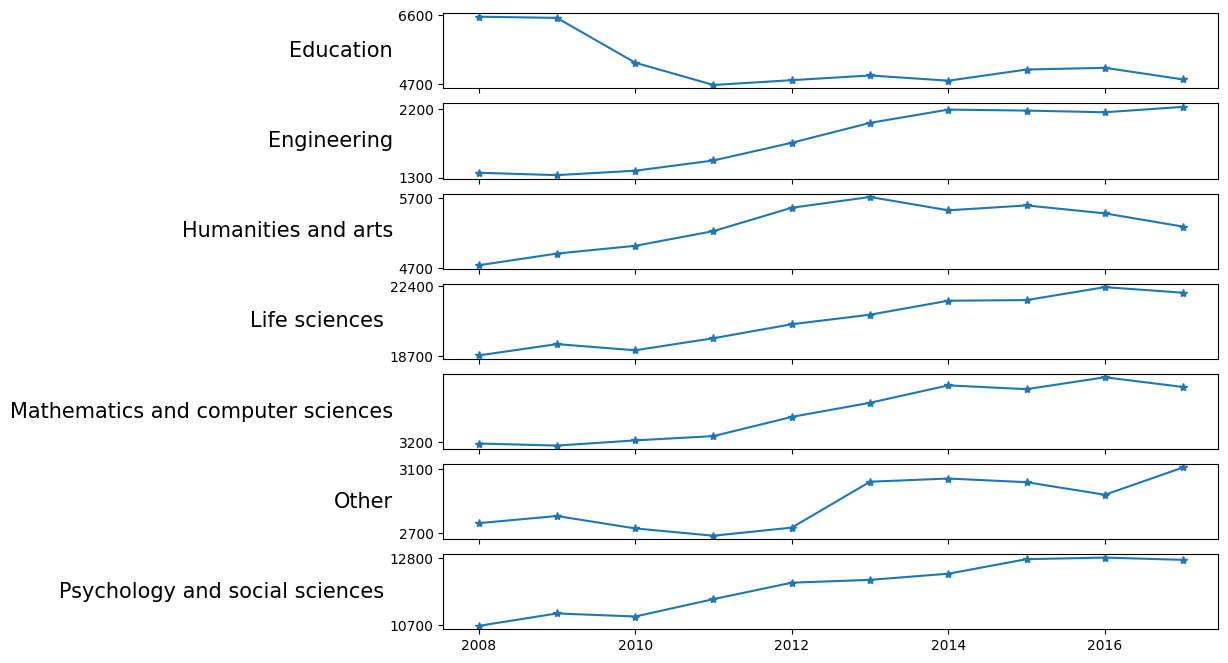

In [6]:
file_path = "./data/phd_by_field.csv" # i've stored data in separate folder
problem3(file_path) # without file_path defaults to JN location to search for data


## Problem 4

In [7]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Output, Input
from datetime import date
import dash_bootstrap_components as dbc
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np    
    
def problem4(file_path="./covid19_ecdc_28_07_20.csv"):
    # Reading data from csv
    data_covid = pd.read_csv(file_path)
    
    # from homework pdf. Manipulating data basically
    data_covid.dateRep=pd.to_datetime(data_covid.dateRep, format="%d/%m/%Y")
    confirmed_by_country=data_covid.pivot(index='countriesAndTerritories', columns='dateRep', values='cases')
    confirmed_7day_mean=confirmed_by_country.rolling(7, axis=1, min_periods=1).mean()
    
    # dash app object
    app = JupyterDash(__name__, external_stylesheets=[dbc.themes.COSMO])

    # defining dash app layout
    app.layout = dbc.Container([
        # First bootstrap row
        dbc.Row([
            # Each row has 3 columns with fixed width 4/12
            dbc.Col([            
                dbc.Label('Date'),
                html.Br(),
                # Date picker object
                dcc.DatePickerSingle(
                    id='my-date-picker-single',
                    min_date_allowed=data_covid.dateRep.min(),
                    max_date_allowed=data_covid.dateRep.max(),
                    initial_visible_month=date(2020, 7, 23),
                    date=date(2020, 7, 23)
                )
            ], width=4),

            dbc.Col(
                # This label used as header for 1 plot
                dbc.Label('7-Day averaged number of cases')
            , width=4),

            dbc.Col(
                # This label used as header for 2 plot
                dbc.Label('Cumulative Number of cases')
            , width=4)

        ]),
        # Second row starts here
        dbc.Row([
            dbc.Col([
                dbc.Label('Country'),
                    html.Br(),
                # Dropdown menu component for country selection
                    dcc.Dropdown(id='covid_country_dropdown',
                         options=[{'label': country, 'value': country}
                                  for country in data_covid['countriesAndTerritories'].unique()], value='Canada'),
                html.H2('Number of Cases'),
                # This div updates with text
                html.Div(id='dd-noc'),
                html.Br(),
                html.H2('Number of Deaths'),
                html.Div(id='dd-nod')
            ], width=4),
            dbc.Col([
                dcc.Graph(id='covid_weekly_plot')
            ], width=4),
            dbc.Col([
                dcc.Graph(id='covid_cumulative_plot')
            ], width=4)
        ])
    ], fluid=True)

    # Dropdown country menu update handling for weekly plot
    @app.callback(Output('covid_weekly_plot', 'figure'),
                  Input('covid_country_dropdown', 'value'))
    def display_covid_mean(country):
        if not country:
            raise PreventUpdate
        fig = px.line(x=confirmed_7day_mean.columns, 
                      y=confirmed_7day_mean.loc[country],
                     labels={'x':'Date', 'y':'Number of Cases'},)
        fig['data'][0]['showlegend']=True
        fig.update_layout(legend_title_text='Country')
        fig['data'][0]['name']=country
        return fig

    # Dropdown country menu update handling for cumulative plot
    @app.callback(Output('covid_cumulative_plot', 'figure'),
                  Input('covid_country_dropdown', 'value'))
    def display_covid_cumulative(country):
        if not country:
            raise PreventUpdate
        df = data_covid.query("countriesAndTerritories == @country")
        df.sort_values('dateRep', inplace=True)
        df['cumulative'] = df.cases.cumsum()
        fig = px.line(df, x='dateRep', y='cumulative',
                         labels={'x':'Date', 'y':'Cumulative Number of Cases'})
        fig['data'][0]['showlegend']=True
        fig.update_layout(legend_title_text='Country')
        fig['data'][0]['name']=country
        return fig

    # Callback for 'Number of cases' div update text
    @app.callback(
        Output('dd-noc', 'children'),
        Input('my-date-picker-single', 'date'),
        Input('covid_country_dropdown', 'value')
    )
    def update_output(date, country):
        cases = data_covid.query("countriesAndTerritories == @country & dateRep == @date")['cases'].values[0]
        return f'The Confirmed number of cases of {country} is {cases}'

    # Callback for 'Number of Deaths' div update text
    @app.callback(
        Output('dd-nod', 'children'),
        Input('my-date-picker-single', 'date'),
        Input('covid_country_dropdown', 'value')
    )
    def update_output(date, country):
        deaths = data_covid.query("countriesAndTerritories == @country & dateRep == @date")['deaths'].values[0]
        return f'{deaths}'


    app.run_server(mode='inline', port=24816)

In [8]:
file_path = "./data/covid19_ecdc_28_07_20.csv"
problem4(file_path)

## Problem 5

## NOT COMPLETED !!!!

* Line animation works

* No pct text
* No dash-lines grid

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FuncFormatter

import re 

file_path='./data/indian_elections.dat'

data_indian = None
with open(file_path, "r") as file:
    raw = file.readlines()
    
    result = []
    for line in raw:
        result.append(re.split(r"\s+", line.strip()))
        
        data_indian = pd.DataFrame(result[1:], columns=result[0])
        data_indian.Year = pd.Series(data_indian.Year.values.astype('int16'))
        data_indian.Perc_Seats = pd.Series(data_indian.Perc_Seats.values.astype('float'))
        data_indian['Perc_Seats'] = data_indian['Perc_Seats'].aggregate(lambda x: x*100)
        data_indian = data_indian.pivot_table(index='Year', columns='Party', values='Perc_Seats')

In [16]:
data_indian.shape

(10, 2)

<IPython.core.display.Javascript object>


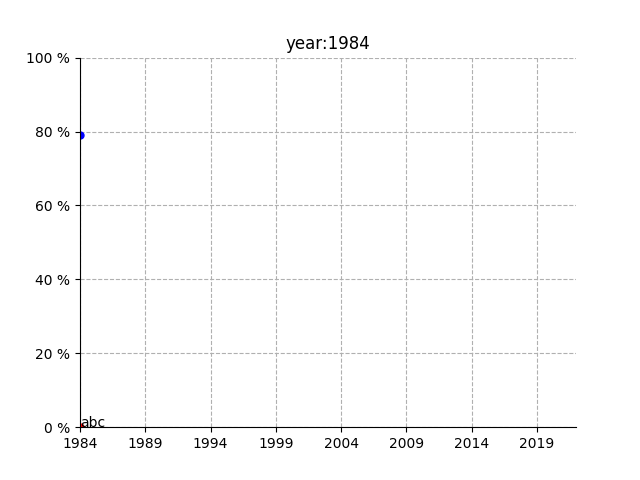

In [93]:
fig, ax = plt.subplots()

header = ax.set_title("year:1984")
ax.spines[['top', 'right']].set_visible(False)
ax.grid(True, 'major', linestyle='--')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: str(x)+' %'))
ax.set_xlim(data_indian.index.min(), data_indian.index.max()+3)
ax.set_ylim(0, 100)
ax.set(xticks=range(1984,2020,5))
ax.set(yticks=range(0,101,20))



l_bjp, = ax.plot(data_indian.BJP.iloc[:1], marker='o', ms=5, color='r')
l_inc, = ax.plot(data_indian.INC.iloc[:1], marker='o', ms=5, color='b')

l_bjp_text = ax.text(1984,0,'abc')
l_inc_text = ax.text(0,0,'')

# t1 = ax.text(x=1984,
#             y=data_indian.iloc[0,0],
#             s='INC')

def fresh():
    l_inc.set_data(data_indian.INC.iloc[:1])
    l_inc.set_data(data_indian.BJP.iloc[:1])
#     l_bjp, = ax.plot(data_indian.index[0], data_indian.iloc[1, 0], marker='o', ms=5, color='r')
#     l_inc, = ax.plot(data_indian.index[0], data_indian.iloc[0, 0], marker='o', ms=5, color='b')
#     l_inc.set_data(data_indian.index[0], data_indian.iloc[0, 0].values)
#     l_bjp.set_data(data_indian.index[0], data_indian.iloc[0, 1].values)
#     header.set_text(f"year:{data_indian.index[frame]}")
    
#     text.set_text(f"year: {data_indian.iloc[frame].index}")


def update(frame):
    if frame <= 1:
        header.set_text(f"year:{data_indian.index[0]}")
    else:
        header.set_text(f"year:{data_indian.index[frame-1]}")
        
    l_inc.set_data(xy=data_indian.INC.iloc[frame])
#     l_inc_text.set(position=l_inc.get_xydata()[-1], text='aaa')
    l_bjp.set_data(data_indian.index[frame], data_indian.iloc[:frame, 1].values)
#     return l_inc, l_bjp
    
    
    
    
#     text.set_text(f"year: {data_indian.iloc[frame,0].index}")
    
#     t1.set_position(x= data_indian.iloc[frame, 1].index, y=data_indian.iloc[frame, 1].value)
#     t1.set_text(f"{data_indian.iloc[frame, 1]}%\nINC")
    
    

ani = FuncAnimation(fig, update, frames=range(0,11),
                     init_func=fresh, blit=True, repeat=True, interval=500)
# init_func=fresh,
plt.show()

In [91]:
data_indian.BJP.iloc[:1]

Year
1984    0.0
Name: BJP, dtype: float64

## Problem 5

## NOT COMPLETED !!!!

* Line animation works

* No pct text
* No dash-lines grid